# 图像阐述 Dino Fun World

Dino Fun World 管理员对你之前的工作印象深刻，想要你创建一些图表，以供他们下一次向高层管理人员汇报工作的演示中使用。用于此作业的数据与用于上一个作业的数据相同。

### 提供的数据库

游乐园管理部门提供的数据库格式化可供任何 SQL 数据库读取。课程员工推荐 使用sqlite3 库。该数据库包含三个表格，分别为“登记”、“景点”和“序列”。每个表中所含的信息如下所示：

`登记`：

   - 说明：游乐园当天所有游客的登记数据。该数据包括两类登记数据，即推测登记数据和实际登记数据。

   - 字段：游客编号 (visitorID)、时间戳 (timestamp)、景点 (attraction)、持续时间 (duration)、类型 (type)
   
`景点`：

   - 游乐园景点包括相应的景点编号、名称、区域、类别和类型。区域包括 VAST 挑战地图，如过山车场区、冻原之地等。类别包括惊险飞车、儿童碰碰车等。类型包括户外过山车、其他游乐项目、旋转木马等

   - 字段：景点编号 (AttractionID)、名称 (Name)、区域 (Region)、类别 (Category), 类型 (type)
   
`序列`：

  - 游客登记序列。这些序列列出每五分钟进入游乐场的每个游客位置。如果游客尚未进入游乐场，则该时间段内序列的值为 0。如果游客已进入游乐场，则序列列出游客最近登记的景点，或游客离开游乐场前最后登记的景点。

  - 字段：游客编号 (visitorID)、序列 (sequence)
  
数据库文件名称为“dinofunworld.db”，可以在 Jupyter Notebook 环境（即 readonly/dinofunworld.db）中的只读目录中找到。

### 作业

管理员希望你创建四个图表：饼图、条形图、折线图和箱形图。所有这些图均可使用提供的数据创建。

图表 1：描绘游览惊险飞车（thrill ride）景点的饼图。

图表 2：描绘美食摊位（food stall）总访问量的柱状图。

图表 3：描绘一天之中参加最新游乐项目 Atmosfear 的折线图。

图表 4：描绘游乐场的儿童碰碰车（Kiddie Rides）总游览量的箱线图。

In [1]:
import sqlite3
from datetime import timedelta
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn = sqlite3.connect('./dinofunworld.db')
c = conn.cursor()

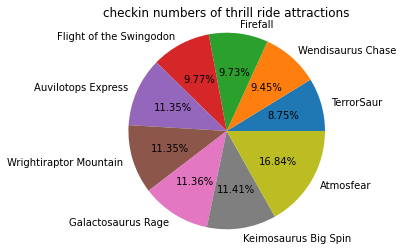

[['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Firefall', 16024], ['Flight of the Swingodon', 16093], ['Auvilotops Express', 18694], ['Wrightiraptor Mountain', 18700], ['Galactosaurus Rage', 18717], ['Keimosaurus Big Spin', 18792], ['Atmosfear', 27747]]


In [2]:
# 图表 1：描绘游览惊险飞车（为）景点的饼图。


# 思路分析：首先查询所有 Category 为 Thrill Rides 的 attraction，这些景点就是 游览惊险飞车
# 然后统计 每个 游览惊险飞车 景点的 checkin 次数
# 最后使用pandas处理数据，用 pyplot 画出饼图
c.execute("SELECT att.Name, count( ck.visitorId) AS c FROM checkin AS ck LEFT JOIN attraction AS att ON ck.attraction = att.AttractionID WHERE att.Category LIKE 'Thrill Rides%' GROUP BY att.Name ORDER BY c;")
thrill_ride_checkin_list = c.fetchall()
thrill_ride_checkin_frame = pd.DataFrame.from_records(thrill_ride_checkin_list, columns=['name', 'checkinNum'])
plt.pie(thrill_ride_checkin_frame['checkinNum'], labels=thrill_ride_checkin_frame['name'], autopct='%0.2f%%', shadow=False)
plt.axis('equal')
plt.title('checkin numbers of thrill ride attractions')
plt.show()
print(thrill_ride_checkin_frame.values.tolist())

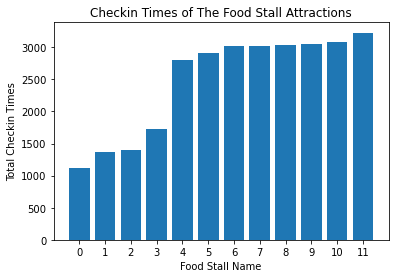

[['Theresaur Food Stop', 1116], ['Paleo Shreckwiches', 1361], ["Shilobite o'Pizza", 1393], ['Krystal Cook Cafe', 1725], ['Granite Slab Pizza', 2810], ['Plaisantly Popped Corn', 2914], ['EberTrex Fries', 3018], ['Permafrosties', 3018], ['Smoky Wood BBQ', 3037], ['Chensational Sweets', 3049], ['Floral Funnels', 3083], ['Ice Age Cones', 3228]]


In [3]:
# 图表 2：描绘美食摊位（food stall）总访问量的柱状图。

# 思路分析：首先查询所有 Category 含有 food 的 attraction，这些景点就是 美食摊位
# 然后统计 每个 美食摊位 景点的 checkin 次数
# 最后使用pandas处理数据，用 pyplot 画出柱状图
c.execute("SELECT att.Name, count( ck.visitorId) AS c FROM checkin AS ck LEFT JOIN attraction AS att ON ck.attraction = att.AttractionID WHERE LOWER( att.Category ) LIKE '%food%' GROUP BY att.Name ORDER BY c;")
food_chackin_list = c.fetchall()
food_chackin_frame = pd.DataFrame.from_records(food_chackin_list, columns=['name', 'checkinTimes'])
plt.bar(range(len(food_chackin_frame['name'])), food_chackin_frame['checkinTimes'])
plt.ylabel('Total Checkin Times')
plt.xlabel('Food Stall Name')
plt.xticks([x for x in range(len(food_chackin_frame['name']))])
plt.title('Checkin Times of The Food Stall Attractions')
plt.show()
print(food_chackin_frame.values.tolist())

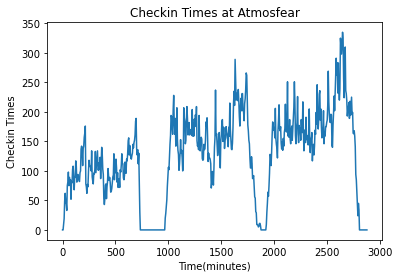

[(0, 0), (5, 0), (10, 9), (15, 19), (20, 49), (25, 62), (30, 46), (35, 44), (40, 33), (45, 75), (50, 81), (55, 98), (60, 75), (65, 89), (70, 80), (75, 85), (80, 52), (85, 82), (90, 80), (95, 103), (100, 108), (105, 93), (110, 68), (115, 90), (120, 89), (125, 117), (130, 108), (135, 81), (140, 89), (145, 94), (150, 87), (155, 85), (160, 82), (165, 97), (170, 100), (175, 137), (180, 142), (185, 134), (190, 109), (195, 138), (200, 142), (205, 157), (210, 164), (215, 176), (220, 78), (225, 73), (230, 62), (235, 77), (240, 73), (245, 99), (250, 118), (255, 109), (260, 108), (265, 106), (270, 100), (275, 134), (280, 90), (285, 83), (290, 78), (295, 96), (300, 95), (305, 102), (310, 133), (315, 97), (320, 110), (325, 121), (330, 134), (335, 102), (340, 101), (345, 114), (350, 103), (355, 123), (360, 87), (365, 111), (370, 140), (375, 129), (380, 103), (385, 94), (390, 53), (395, 43), (400, 53), (405, 76), (410, 78), (415, 53), (420, 73), (425, 82), (430, 104), (435, 91), (440, 84), (445, 89),

In [5]:
# 图表 3：描绘一天之中参加最新游乐项目 Atmosfear 的折线图。

# 思路分析：首先查询所有 Atmosfear的 attractionID
# 然后通过attractionID查询所有参观 Atmosfear的游客 sequences 记录
# 将 sequences 数据使用pandas进行处理，对 sequence 字段数据提取为标记数组（参观Atmosfear时标记为 1，未参观Atmosfear时标记为 0）
# 最后对 标记数组 进行 统计求和，用 pyplot 画出折线图

c.execute("SELECT attractionId FROM attraction where Name = 'Atmosfear';")
attractionID = c.fetchone()[0]
c.execute("SELECT visitorID, sequence FROM sequences where sequence LIKE '%" + str(attractionID) + "%';")
atmosfear_sequence_list = c.fetchall()
atmosfear_sequence_frame = pd.DataFrame.from_records(atmosfear_sequence_list, columns=['visitorId', 'sequence'])
atmosfear_sequence_frame['checkin_flag_list'] = atmosfear_sequence_frame['sequence'].apply(lambda s: [1 if x == str(attractionID) else 0 for x in s.split("-")])

visitor_checkin_times_list = np.sum(atmosfear_sequence_frame['checkin_flag_list'].values.tolist(), axis=0)
# sequence数据是每5分钟检查一次
x = range(0, len(visitor_checkin_times_list)*5, 5)
plt.plot(x, visitor_checkin_times_list)
plt.ylabel('Checkin Times')
plt.xlabel('Time(minutes)')
plt.title('Checkin Times at Atmosfear')
plt.show()
result = [(x[i], visitor_checkin_times_list[i]) for i in range(len(x))]
print(result)

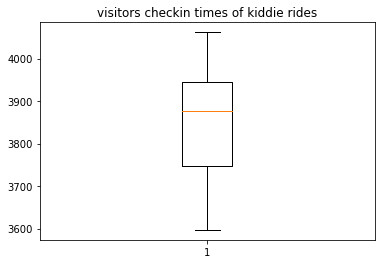

[3597, 3640, 3747, 3747, 3759, 3877, 3922, 3925, 3963, 4022, 4062]


In [6]:
# 图表 4：描绘游乐场的儿童碰碰车（Kiddie Rides）总游览量的箱线图。


# 思路分析：Category 为 Kiddie Rides 的 attraction 就是 儿童碰碰车
# 使用 SQL 联表查询并统计 每个 Kiddie Rides 的游客 checkin 次数，
# 将 sequences 数据使用pandas进行处理，对 sequence 字段数据提取为标记数组（参观Atmosfear时标记为 1，未参观Atmosfear时标记为 0）
# 最后对 标记数组 进行 统计求和，用 pyplot 画出箱线图

c.execute("SELECT att.Name, count( ck.visitorId) AS c FROM checkin AS ck LEFT JOIN attraction AS att ON ck.attraction = att.AttractionID WHERE att.Category LIKE 'Kiddie Rides%' GROUP BY att.Name ORDER BY c;")
kiddie_rides_checkin_times_list = c.fetchall()
kiddie_rides_checkin_times_frame = pd.DataFrame.from_records(kiddie_rides_checkin_times_list, columns=['name', 'checkinTimes'])
plt.boxplot(kiddie_rides_checkin_times_frame['checkinTimes'])
plt.title('visitors checkin times of kiddie rides')
plt.show()
print(kiddie_rides_checkin_times_frame['checkinTimes'].values.tolist())